In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

## Загрузка файла

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.columns = df.columns.str.lower()

## основные метрики

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Пустых значений нигде нет.

Посмотри статистику числовых полей

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


и нечисловых

In [6]:
df.describe(include=['O'])

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


## Корреляционная матрица

In [7]:
df[df.columns[:8]].corr(numeric_only=False)\
    .style.background_gradient(cmap='RdYlBu_r', vmin=-0.5,vmax=0.6)\
    .format(precision=3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years
satisfaction_level,1.000,0.105,-0.143,-0.020,-0.101,0.059,-0.388,0.026
last_evaluation,0.105,1.000,0.349,0.340,0.132,-0.007,0.007,-0.009
number_project,-0.143,0.349,1.000,0.417,0.197,-0.005,0.024,-0.006
average_montly_hours,-0.020,0.340,0.417,1.000,0.128,-0.010,0.071,-0.004
time_spend_company,-0.101,0.132,0.197,0.128,1.000,0.002,0.145,0.067
work_accident,0.059,-0.007,-0.005,-0.010,0.002,1.000,-0.155,0.039
left,-0.388,0.007,0.024,0.071,0.145,-0.155,1.000,-0.062
promotion_last_5years,0.026,-0.009,-0.006,-0.004,0.067,0.039,-0.062,1.000


Наибольшая прямая корреляция - около 0,4 - между количеством проектов и количеством часов на работе, примерно такая же, но обратная корреляция, между удовлетворенностью работой и увольнением. Наименьшая корреляция выражена между стажем и несчастными случаям и между количеством часов на работе и повышением сотрудника в должности

## Сколько сотрудников в каждом департаменте

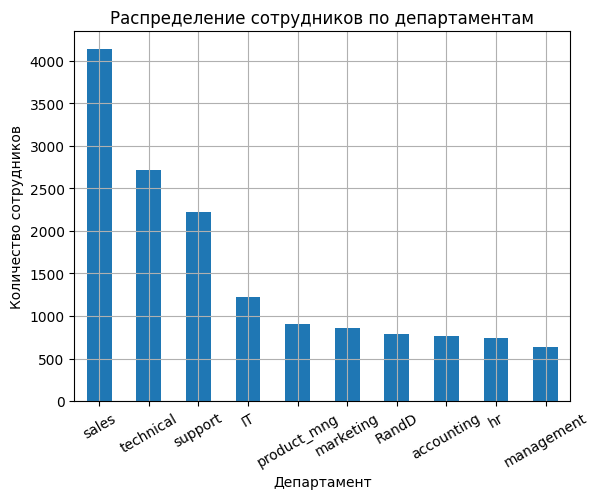

In [9]:
df.department.value_counts().plot(kind='bar')
plt.title('Распределение сотрудников по департаментам')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.grid()
plt.xticks(rotation=30)
plt.show()

Больше всего сотрудников в *sales*, далее идут *technical*, *support*, *it*, в остальных отделах примерно одинаковое число.

## Распределение зарплаты

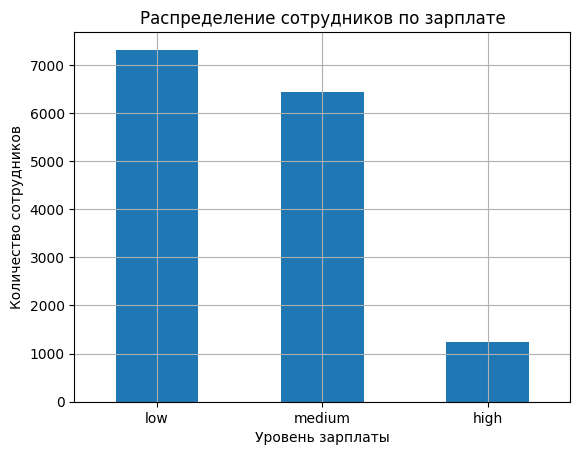

In [10]:
df.value_counts('salary').plot(kind='bar')
plt.title('Распределение сотрудников по зарплате')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.grid()
plt.xticks(rotation=0)
plt.show()

Большинство получают низкую и среднюю зарплату.

## Распределение зарплаты по департаментам

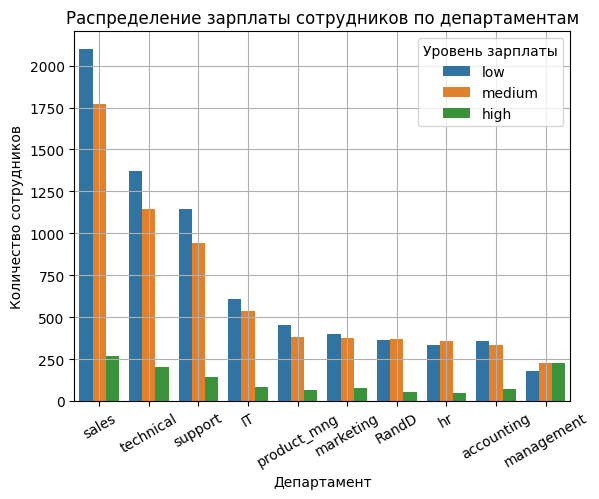

In [11]:
salary_department = (df.groupby(['department', 'salary'])
                     .satisfaction_level.count()
                     .sort_values(ascending=False)
                     .reset_index())
sns.barplot(
    salary_department,
    x='department', hue='salary', y='satisfaction_level'
)
plt.title('Распределение зарплаты сотрудников по департаментам')
plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.legend(title='Уровень зарплаты')
plt.grid()
plt.xticks(rotation=30)
plt.show()

От других департаментов отличается *management*, потому что в нем больше доля сотрудников с выоким уровнем зарплаты

## Проверка гипотезы

Проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.  
Посмотрим как распределены рабочие часы среди сотрдников с разным уровнем зарплаты

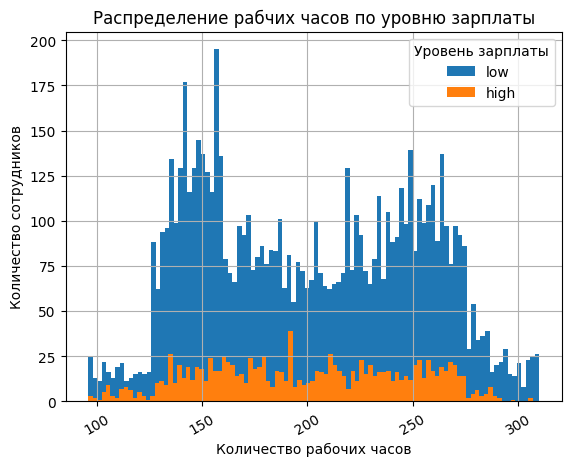

In [12]:
df[df.salary == 'low'].average_montly_hours.plot(kind='hist', bins=100)
df[df.salary == 'high'].average_montly_hours.plot(kind='hist', bins=100)
plt.title('Распределение рабчих часов по уровню зарплаты')
plt.xlabel('Количество рабочих часов')
plt.ylabel('Количество сотрудников')
plt.legend(['low','high'], title='Уровень зарплаты')
plt.grid()
plt.xticks(rotation=30)
plt.show()

Данные распределены не нормально.  
Для проверки гипотезы воспользуемся критерием Манна-Уитни, уровент статистической значимости 0,05. Определим гипотезы:  
Н0 - Распределения одинаковы
Н1 - распределения различаются

Возьмем случайным образом по 50 значений часов проведенных на работе для каждого уровня зарплаты и применим к ним критерий Манна-Уитни

In [13]:
low_salary = np.random.choice(df[df.salary == 'low'].average_montly_hours, 50)
high_salary = np.random.choice(df[df.salary == 'high'].average_montly_hours, 50)

In [14]:
stat, p = st.mannwhitneyu(low_salary, high_salary)

print(f"Статистика = {stat:.5f}, p-значение = {p:.5f}")

if p > 0.05:
    print('Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые')
else:
    print('Отклоняем нулевую гипотезу, распределения, вероятно, различаются')

Статистика = 1389.50000, p-значение = 0.33790
Не отклоняем нулевую гипотезу, распределения, вероятно, одинаковые


Вероятно, нет связи между временем, проведенным на работе и уровнем зарплаты

## Показатели уволившихся и не уволившихся сотрудников

### по повышению

In [19]:
df.groupby('left').promotion_last_5years.mean()

left
0    0.026251
1    0.005321
Name: promotion_last_5years, dtype: float64

Среди не уволившихся 2,6% сотрудников повышались, среди уволившихся - только 0,5%

### по степени удовлетворенности

In [18]:
df.groupby('left').satisfaction_level.mean()

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

Уволившиеся менее удовлетворены работой

### по количеству проетов

In [20]:
df.groupby('left').number_project.mean()

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

Среднее количество примерно одинаковое среди работающих и уволившихся сотрудников